<a href="https://colab.research.google.com/github/dhanyades/CMSC320_Summer25_Git/blob/main/checkpoint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Checkpoint 2**

---


#**INTRODUCTION**
>Electric vehicles (EVs) have emerged as a key solution to reducing greenhouse gas emissions and achieving a sustainable future in transportation. With global efforts to reduce dependence on fossil fuels, EV adoption has gained significant momentum over the past decade. Our project focuses on exploring sales trends, growth patterns, and market shares of electric vehicles across different regions and categories from 2010 to 2024.

###<u>The dataset provides information on different types of electric vehicles:</u>

>>**BEV (Battery Electric Vehicle)**: Fully electric vehicles powered only by batteries with no internal combustion engine.

>>**PHEV (Plug-in Hybrid Electric Vehicle)**: Vehicles that combine a battery-powered electric motor with a traditional fuel engine, offering both electric-only and hybrid driving modes.

>>**EV (Electric Vehicle)**: A general term encompassing both BEVs and PHEVs.

###<u>The dataset includes multiple metrics related to electric vehicles:</u>

>>**EV sales (number of vehicles)**: The total count of electric vehicles sold within a region and year.

>>**EV stock share (percentage)**: The proportion of electric vehicles within the overall vehicle fleet, indicating market penetration of EVs in the total stock.

>>**EV sales share (percentage)**: The share of electric vehicles sold as a percentage of all vehicle sales, reflecting how popular EVs are among new car buyers.

###<u>Relevance</u>
>This dataset is relevant for companies in the automotive sector, policymakers designing green transportation strategies, and consumers interested in EV market trends. Understanding sales growth, regional adoption patterns, and market share helps stakeholders assess progress toward sustainable mobility.


###<u>Goal</u>
>Our project focuses on exploring EV sales over time and across regions. By visualizing this data and applying machine learning, we aim to uncover insights into how the EV market has evolved, regional disparities, and potential future adoption patterns. Ultimately, this work highlights progress toward environmentally friendly transportation and informs decisions that support further EV adoption.


#**DATA COLLECTION**
For this project, we utilized the Electric Car Sales 2010–2024 dataset published by Jain, A. (2024) on Kaggle. The dataset is publicly accessible and can be found at:

📊 Dataset Link: https://www.kaggle.com/datasets/jainaru/electric-car-sales-2010-2024

This dataset provides a global overview of electric vehicle (EV) sales, market share, and stock growth from 2010 to 2024. It contains information for multiple regions, vehicle categories, and powertrain types.

The datset includes following columns
1. region: Geographical area where the data was collected (e.g., Australia, Germany).

2. category: Nature of the data, either **Historical**(actuals) or **Projection**(future estimates).

3. parameter: Type of metric (e.g., EV sales, EV stock share, EV sales share)

4. mode: Mode of transport, mainly focusing on **Cars**

5. powertrain: Type of electric vehicle: **BEV** (Battery Electric Vehicle), **PHEV** (Plug-in Hybrid EV), or **EV** (general electric vehicle).

6. year: Year of the observation (e.g., 2011, 2015, etc.).

7. unit: Unit of measurement: **Vehicles** (count) or **percent** (share)

8. value: Actual recorded value for that observation

The dataset offers both raw EV sales numbers and market share percentages, allowing for a comprehensive analysis of electric vehicle adoption trends.

We selected this dataset for its detailed structure, broad geographic coverage, and relevance to understanding the global transition toward electric transportation.

  







#**DATA PROCESSING**

The first step in our data processing pipeline involved loading the dataset into our environment using pandas. We used the .read_csv() function to import the dataset from the project directory:

[link text](https://)

We imported the dataset using **pandas**

```
# This is formatted as code
```

:

In [15]:
import pandas as pd
df = pd.read_csv("sales_historical_cars.csv")


This loaded the raw dataset, which contains sales, stock share, and sales share information for electric vehicles across different regions from 2010 to 2024.

#**DATA CLEANING**

After collecting the dataset, we performed several processing steps to filter and prepare the data for analysis. Our project focuses specifically on electric vehicle sales across different regions, so we refined the dataset as follows:

We filtered the dataset to keep only rows where the parameter is "EV sales", as our focus is on actual electric vehicle sales rather than stock share or sales share percentages.

>First, the following regions were excluded:
"World", "Europe", "EU27", "Rest of the world"

>Second, we dropped unnecessary columns that are not relevant to our specific analysis:
>>category: describes whether the data is historical or projected (all our selected data is historical).

>>mode — mode of transport (our dataset only includes cars).

>>unit — unit of measurement, which is consistent for sales (vehicles)

After these processing steps, we obtained a cleaned dataset containing only electric vehicle sales by region, year, and powertrain type (BEV, PHEV, EV). This processed data is ready for visualization and further analysis to explore trends in EV adoption worldwide.



In [16]:
sales_df = df[df['parameter'] == 'EV sales']
sales_df = sales_df[sales_df['region'] != 'World']
sales_df = sales_df[sales_df['region'] != 'Europe']
sales_df = sales_df[sales_df['region'] != 'EU27']
sales_df = sales_df[sales_df['region'] != 'Rest of the world']
sales_df.drop(columns = ['category', 'mode', 'unit'], inplace = True)
sales_df

,region,parameter,powertrain,year,value
0,Australia,EV sales,BEV,2011,49.0
6,Australia,EV sales,PHEV,2012,80.0
9,Australia,EV sales,BEV,2012,170.0
10,Australia,EV sales,BEV,2013,190.0
13,Australia,EV sales,PHEV,2013,100.0
...,...,...,...,...,...
3629,USA,EV sales,FCEV,2022,2700.0
3630,USA,EV sales,BEV,2022,800000.0
3635,USA,EV sales,BEV,2023,1100000.0
3636,USA,EV sales,FCEV,2023,3000.0


# **Investigating Representation of Countries in EV Sales and Growth Rates in Sales**


---



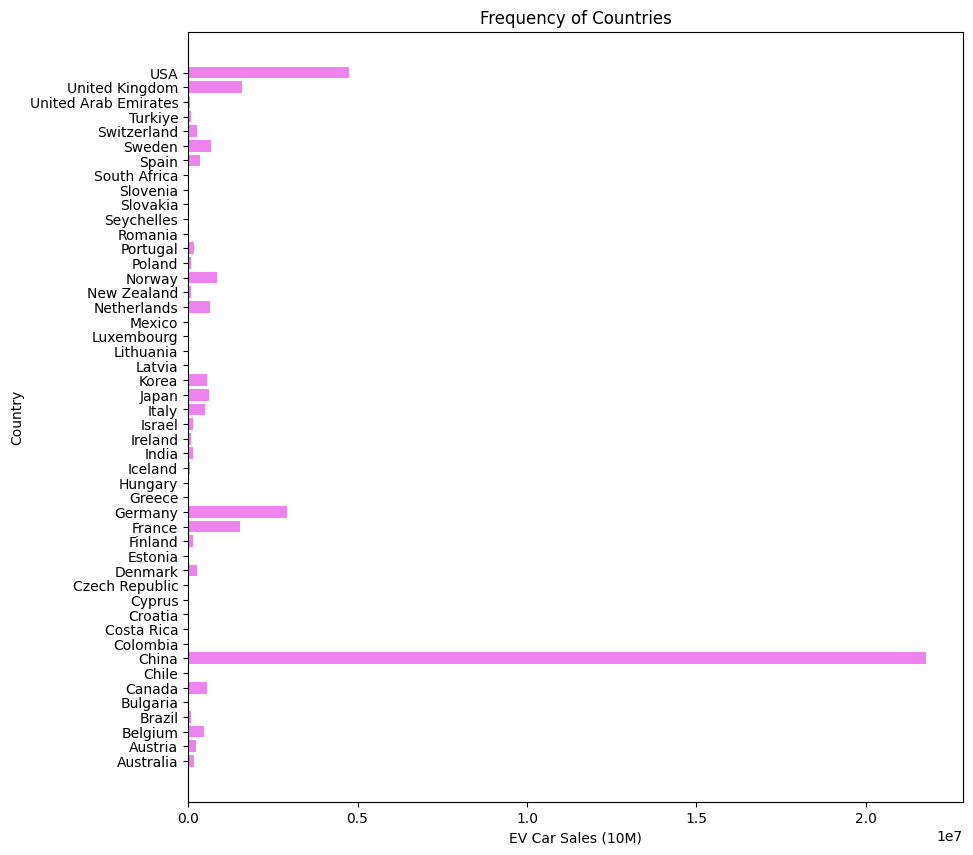

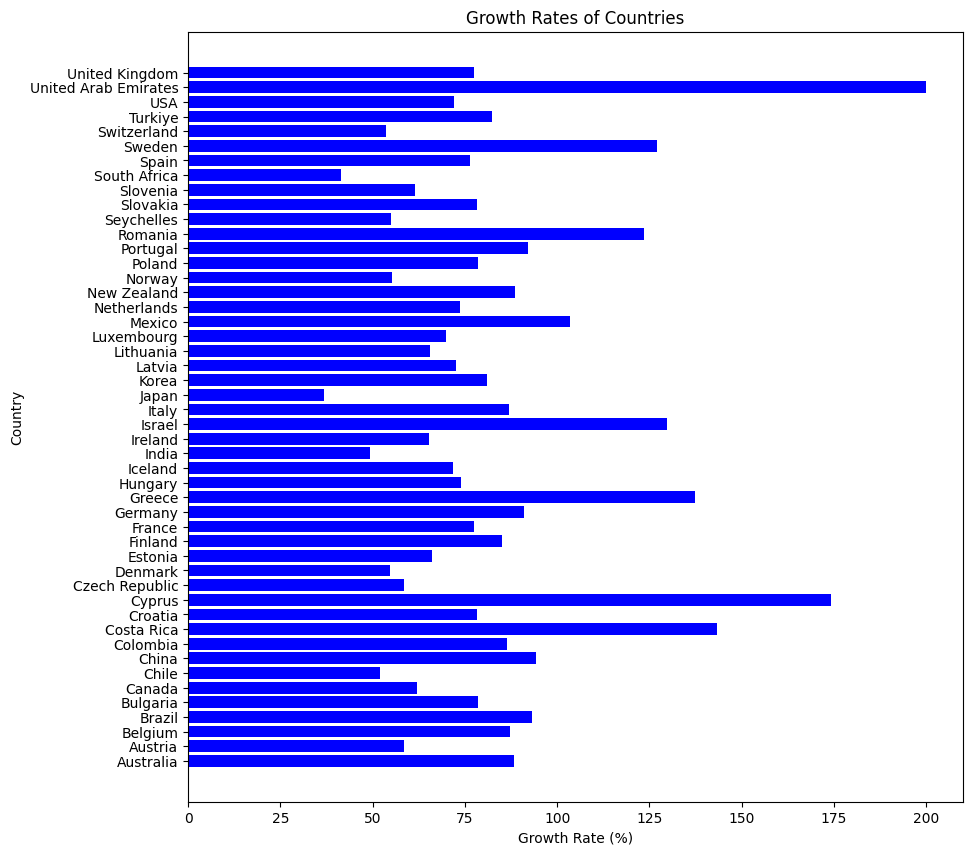

In [17]:
import matplotlib.pyplot as plt
import numpy as np
counts = []
for country in sales_df['region'].unique():
  counts.append(sales_df[sales_df['region'] == country]['value'].sum())
plt.figure(figsize=(10, 10))
plt.barh(sales_df['region'].unique(), counts, color = 'violet')
plt.title('Frequency of Countries')
plt.xlabel('EV Car Sales (10M)')
plt.ylabel('Country')
plt.show()
grouped = sales_df.groupby(['region', 'year'], as_index=False)['value'].sum()
grouped = grouped.sort_values(by = ['region', 'year'])
yeardiff = grouped.groupby('region')['year'].max() - grouped.groupby('region')['year'].min()
first_val = grouped.groupby('region')['value'].first()
last_val = grouped.groupby('region')['value'].last()
growth_rates = (last_val / first_val)**(1 / yeardiff) - 1
plt.figure(figsize=(10, 10))
plt.barh(growth_rates.index, growth_rates.values*100, color = 'blue')
plt.title('Growth Rates of Countries')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Country')
plt.show()

As expected, the country with one of the highest populations, China, has the highest number of car sales. Surprisingly, India with the actual largest population has some of the lowest sales. Overall, East Asian and European countries lead in EV sales, in addition to the U.S. and Australia.  

Two countries in Middle East lead in EV sale growth rate: UAE and Cyprus. Both of thesecountries reported very low sales in their first few years and then nearly tripled by the end. While the final sales are still low, negligible in the first graph, sales in these countries are growing very quickly.  

# **Comparing Sales Growth of Recorded EV Types**

---



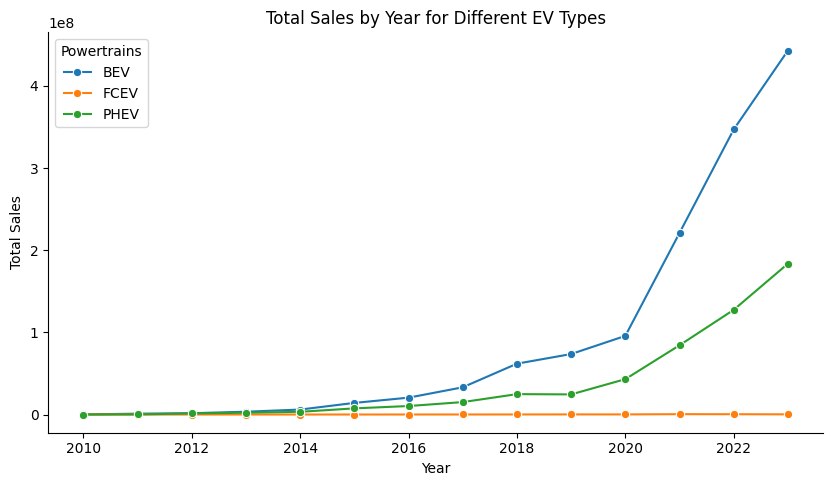

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

powertrain_df = sales_df.copy()
powertrain_df_total = powertrain_df.groupby(['powertrain', 'year'])['value'].sum().reset_index()
powertrain_df_total.rename(columns={'value': 'total_sales'}, inplace=True)
powertrain_df = powertrain_df.merge(powertrain_df_total, on=['powertrain', 'year'])
powertrain_df.drop(columns = ['value', 'region'], inplace = True)
powertrain_df.drop_duplicates()

grouped_EV_type = powertrain_df.groupby(['year', 'powertrain'], as_index=False)['total_sales'].sum()

plt.figure(figsize=(10, 5.2))
sns.lineplot(data=grouped_EV_type, x='year', y='total_sales', hue='powertrain', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year for Different EV Types')
sns.despine()
plt.legend(title='Powertrains')
plt.show()

The reorganized data table for this graph considers the total number of sales for each EV type on a yearly basis, summing all sales of the same EV type from the recorded countries in the dataset.

BEV (Battery Electric Vehicles) cars have the most sales by a wide margin, with PHEV (Plug-in Hybrid Electric Vehicles) as the second most popular. FCEV (Fuel Cell Electric Vehicles) are far less popular, but still have an upward trend in sales towards more recent years.

# **Top 10 GDP Countries 2025 EV Sales from 2010-2024**

To better understand global EV adoption, we analyzed electric vehicle sales across the top 10 GDP countries from 2010 to 2025. This visualization highlights how EV uptake has varied among these economic powerhouses and reveals trends in growth over the past decade.

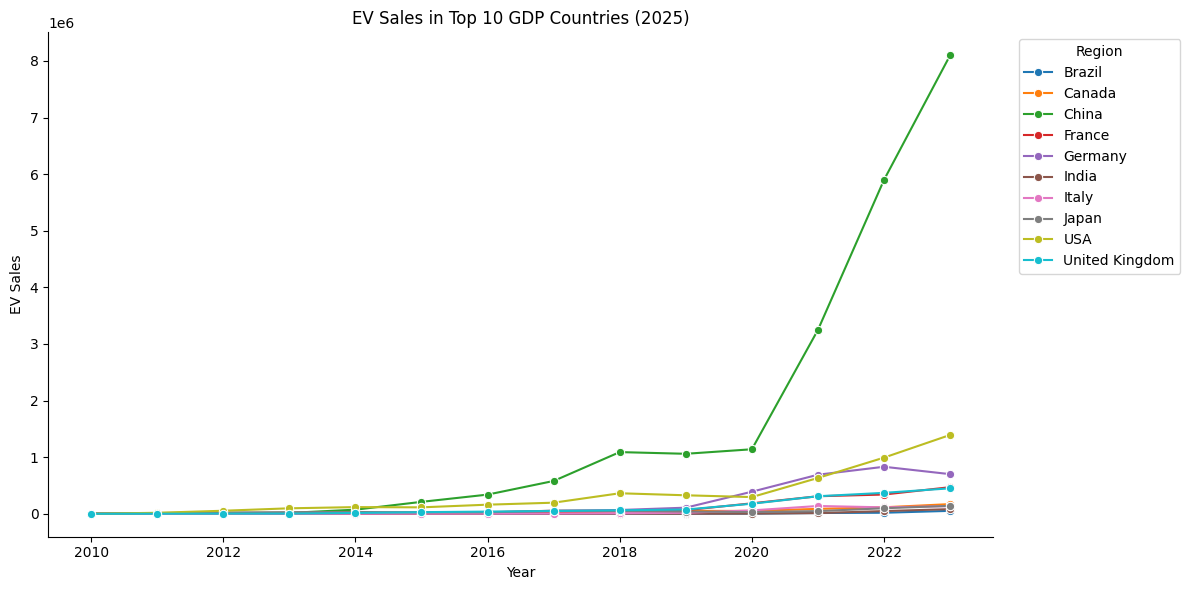

In [19]:
top10_gdp = [
    'USA', 'China', 'Germany', 'India', 'Japan',
    'United Kingdom', 'France', 'Italy', 'Canada', 'Brazil'
]

import matplotlib.pyplot as plt
import seaborn as sns

ev_df = sales_df.copy()
ev_df = ev_df[ev_df['region'].isin(top10_gdp)]

ev_agg = (
    ev_df.groupby(['region', 'year'], as_index=False)['value']
    .sum()
    .rename(columns={'value': 'ev_sales'})
)

ev_pivot = ev_agg.pivot(index='year', columns='region', values='ev_sales').fillna(0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=ev_agg, x='year', y='ev_sales', hue='region', marker='o')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.title('EV Sales in Top 10 GDP Countries (2025)')
plt.legend(title='Region', bbox_to_anchor=(1.02, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

As shown in the graph, China leads by a significant margin, with exponential growth in EV sales beginning around 2020. The United States follows with steady growth, particularly post-2021. European nations such as Germany, France, and the UK show moderate but consistent increases. In contrast, countries like Brazil and India lag behind, reflecting slower adoption or limited infrastructure. This disparity underscores how economic scale doesn't always correlate with EV adoption and highlights the impact of national policy and infrastructure on the EV market.